In [1]:
import numpy as np
import osmnx as ox
import networkx as nx
import pickle
from HGA import osmidRoute
from VRPForm import loadInstance

In [2]:
G = ox.load_graphml('./3_boroughs_data/network.osm.graphml')

In [13]:
vrp_d = loadInstance('MDTW_cust30', True, True)
vrp_c = loadInstance('MDTW_cust30', True, False)

In [4]:
with open('routes1.pickle', 'rb') as f:
    loaded_data = pickle.load(f)
print(loaded_data)

{'decentralised': [[[[1, 15, 14, 1]], [[3, 11, 16, 3]], [[5, 20, 12, 19, 5]], [[10, 17, 18, 13, 10]]], [[[2, 25, 23, 21, 2]], [[1, 29, 13, 19, 24, 1]], [[4, 14, 17, 4]], [[3, 22, 30, 27, 3]], [[5, 16, 12, 5], [5, 18, 11, 5]], [[8, 26, 15, 28, 8]]], [[[2, 39, 38, 33, 2]], [[1, 24, 15, 21, 35, 17, 27, 18, 1]], [[4, 22, 36, 23, 34, 20, 4]], [[3, 37, 16, 25, 3]], [[6, 13, 14, 40, 26, 11, 12, 31, 29, 28, 6]], [[9, 19, 32, 30, 9]]], [[[2, 41, 34, 46, 37, 36, 2]], [[1, 22, 27, 32, 1]], [[3, 47, 30, 35, 26, 20, 49, 12, 3]], [[4, 38, 29, 43, 4]], [[6, 42, 16, 44, 6]], [[5, 23, 17, 33, 21, 5]], [[8, 31, 15, 24, 13, 28, 40, 11, 14, 8]], [[7, 19, 50, 25, 45, 48, 18, 7]]]], 'centralised': [[[[10, 17, 18, 11, 16, 20, 13, 14, 15, 19, 12, 10]]], [[[10, 18, 14, 17, 29, 15, 28, 24, 11, 19, 13, 10]], [[6, 22, 12, 30, 16, 27, 20, 25, 23, 21, 26, 6]]], [[[1, 34, 31, 1]], [[7, 15, 35, 7], [7, 20, 24, 33, 7], [7, 21, 18, 7], [7, 23, 19, 38, 7], [7, 30, 11, 7], [7, 26, 29, 12, 7], [7, 32, 37, 22, 7], [7, 25, 

In [14]:
all_routes_d = loaded_data['decentralised']
all_routes_c = loaded_data['centralised']

route_d = all_routes_d[2]
route_c = all_routes_c[2]


print(route_d)
print(route_c)

[[[2, 39, 38, 33, 2]], [[1, 24, 15, 21, 35, 17, 27, 18, 1]], [[4, 22, 36, 23, 34, 20, 4]], [[3, 37, 16, 25, 3]], [[6, 13, 14, 40, 26, 11, 12, 31, 29, 28, 6]], [[9, 19, 32, 30, 9]]]
[[[1, 34, 31, 1]], [[7, 15, 35, 7], [7, 20, 24, 33, 7], [7, 21, 18, 7], [7, 23, 19, 38, 7], [7, 30, 11, 7], [7, 26, 29, 12, 7], [7, 32, 37, 22, 7], [7, 25, 13, 14, 39, 7], [7, 16, 28, 27, 17, 7]], [[10, 36, 40, 10]]]


In [15]:
osmid_d = [osmidRoute(route,vrp_d) for some_routes in route_d for route in some_routes]
osmid_c = [osmidRoute(route,vrp_c) for some_routes in route_c for route in some_routes]
print(osmid_d)

[[33141616, 33208350, 301479890, 298917261, 33141616], [27320281, 8868969976, 1029416577, 276492247, 26787867, 224676, 1767962850, 26592981, 27320281], [21533913, 7707253600, 1690265343, 197978, 27511228, 26596790, 21533913], [20962511, 37868246, 7528403151, 299218, 20962511], [1691189781, 33203884, 2620430672, 1959070618, 1377168610, 25316200, 96071468, 95984585, 274596, 726067392, 1691189781], [198046, 102102, 20961093, 198014, 198046]]


In [16]:
subpaths_d = []
subpaths_c = []
for route in osmid_d:
    for i in range(len(route) - 1):
        subpath = nx.shortest_path(G, route[i], route[i + 1], weight='travel_time')
        subpaths_d.append(subpath)

for route in osmid_c:
    for i in range(len(route) - 1):
        subpath = nx.shortest_path(G, route[i], route[i + 1], weight='travel_time')
        subpaths_c.append(subpath)

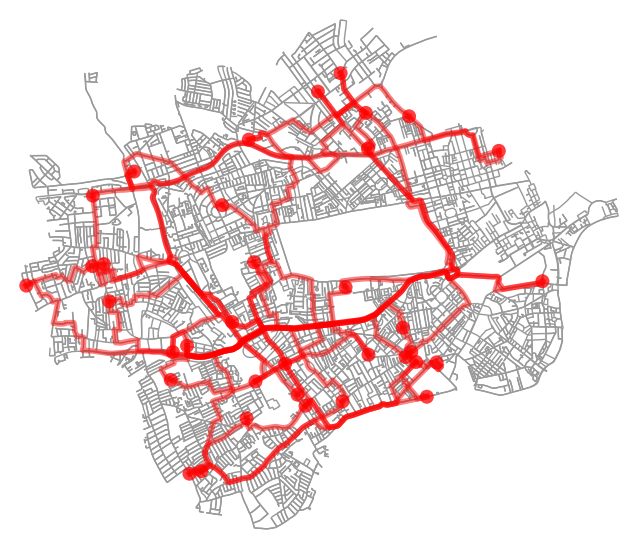

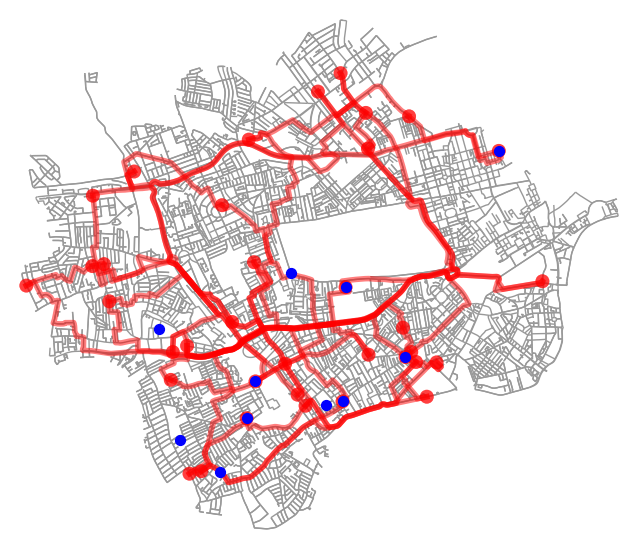

In [21]:
fig,ax = ox.plot_graph_routes(G, subpaths_d, route_linewidth=6, node_size=0, bgcolor='w')
ax.scatter(vrp_d.depot_x, vrp_d.depot_y, c='blue', s=50, zorder=3)
fig


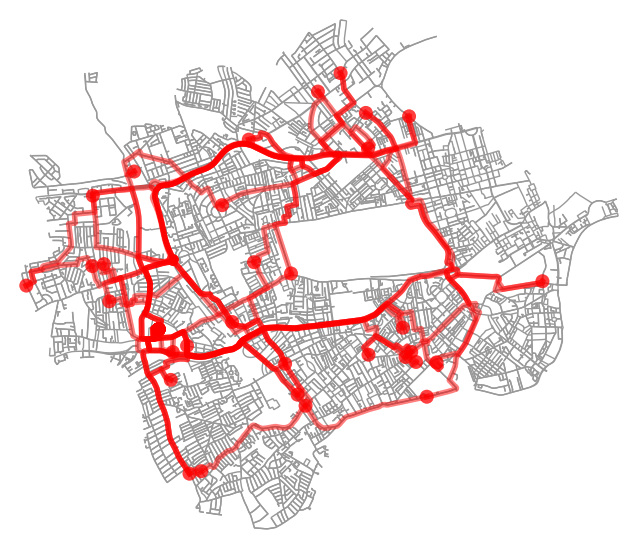

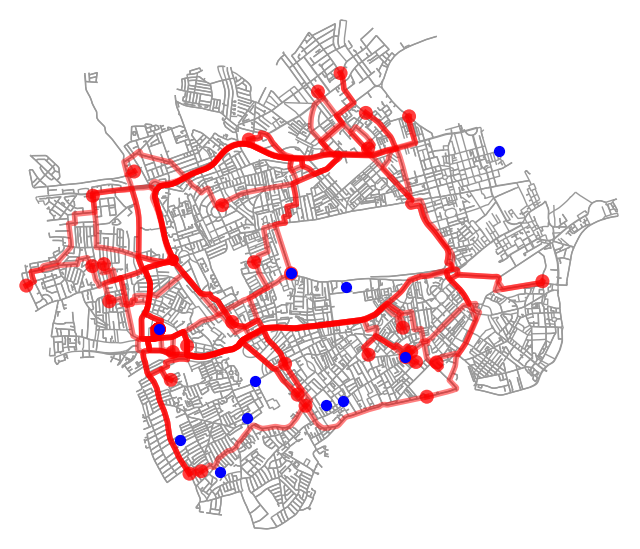

In [22]:
fig,ax = ox.plot_graph_routes(G, subpaths_c, route_linewidth=6, node_size=0, bgcolor='w')
ax.scatter(vrp_c.depot_x, vrp_c.depot_y, c='blue', s=50, zorder=3)
fig
